# Introduction

The purpose of this competion is the estimate the time taken from the pickup to the destination of the the package that has been ordered. This has been provided under Zindi which is a platform that is used to connect the organisations with the data science community in Africa to solve the world most pressing challenges using machine learning (ML) and Artificial intelligence (AI). In consequence, a company called Sendy Logistics has provided this problem for the which will be explore in length in this work. 

    The challenge has been described on Zindi as follows:
"Data is a critical component in helping Sendy to build more efficient, affordable and accessible solutions. Given the details of a Sendy order, can we use historic data to predict an accurate time for the arrival of the rider at the destination of a package? In this competition, we’re challenging you to build a model that predicts an accurate delivery time, from picking up a package to arriving at the final destination. An accurate arrival time prediction will help all businesses to improve their logistics and communicate an accurate time to their customers."


**Sendy Logistics:**

Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa.The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions, to providing dedicated support for goods on the move.

Currently operating in Kenya and Uganda, Sendy is expanding to Nigeria and Tanzania, to enable thousands more businesses to move volumes of goods easily, anywhere, at any time. Sendy aggregates a pool of delivery options from 28 ton, 14 ton, 5 ton trucks to pick up trucks, vans and motorcycles.

<p><img src="./image/Sendy-delivery-1200x500.jpg" alt="Sendy Logistics Logo"></p>


Sendy Logistics has realised that data is a critical component that can aid in building more efficient, affordable and accessible solutions as such they are interested in using data to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. 

The solution will help Sendy enhance customer communication and the reliability of its service; which will ultimately improve customer experience. In addition, the solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business through improved resource management and planning for order scheduling.

To help Sendy achieve this goal we will build a predictive model that will predict estimated time of delivery of orders by looking at all factors that could influence the time from pick up to arrival of an order such as distance, date, the rider delivering the order etc.

# Loading Required Libraries: ##

In [271]:

# Modules used to handle data:
import numpy as np
import pandas as pd
from numpy import arange

# Modules used for Data Visualization:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical metrics modules used to evaluate the performance of the models:
from sklearn.metrics import mean_squared_error

# Module implemented when working with Feature scaling:
from sklearn.preprocessing import StandardScaler

# Model regressor modules:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RepeatedKFold

# lightgbm does not come preinstalled, to install it uncomment the line below
# !pip install lightgbm
from lightgbm import LGBMRegressor

After importing the modules it is worth noting that the modules that were used to handle the data were numpy and pandas. The numpy libraries were implemented to work with numpy arrays. On the other hand, the pandas were used to merge and modify our dataset. In order to make sense of the data by visualizing it, the matplotlib and seaborn libraries were used. On the next step, we note the use of pandas to load the `csv` files. 

## Loading the dataset ##

- Four datafiles were loaded named:
    1. riders : `Riders.csv` contains information of riders that make the deliveries.
    2. train : `Train.csv` contains  Sendy historic data of orders with 28 features, this is the data we will use to train our model.
    3. test : `Test.csv` contains  Sendy historic data of orders with 24 features, this is the data we will use to test our model. 
    4. var_def: The `VariableDefinitions.csv` consists of features that are abbreviated, this dataset consists descriptions of all the features contained in the three datasets



In [112]:
#Loading the data:
riders = pd.read_csv("./regression data/Riders.csv")
train = pd.read_csv("./regression data/Train.csv")
test = pd.read_csv("./regression data/Test.csv")
var_def = pd.read_csv('./regression data/VariableDefinitions.csv')

As we have completed loading the CSV's we looked into each of the dataframe to understand the data at hand. We start by analysing the train, test and riders dataset.

# Analysis of the data

Here we explore the datasets to get an understanding of the features involved and how they related to each other. In gathering the insights into the data, we looked into each datasets by looking for:

- View the first five rows of the dataset.
- Look at the structure of that particular dataset. Returns size of dataframe/series which is equivalent to total number of elements. That is rows x columns.
- Look at the info of these features of the dataframe. This function is crucial because it provides a consice summary of the dataframe. When doing exploratory analysis of the data it becomes handy. 

In [113]:
# View of the first 5 columns of the train datatset.
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [114]:
# The (rows ,columns) of the train dataframe:
train.shape

(21201, 29)

In [115]:
# The quick overview of the train dataset:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [116]:
# View of the first 5 columns of the test datatset.
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [117]:
# The (rows ,columns) of the test dataframe:
test.shape

(7068, 25)

In [118]:
# The quick overview of the test dataset:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

In [119]:
# View of the first 5 columns of the riders datatset.
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [120]:
# The (rows ,columns) of the riders dataframe:
riders.shape

(960, 5)

In [121]:
# The quick overview of the test dataset:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


**Key observations:**
- The target column for modelling is the the "Time from Pickup to Arrival", which is rightfully in the train dataset.
- The train dataset has four extra columns, compared to the 25 that are in the test dataset. The four extra columns are: 

    1. Arrival at Destination - Day of Month
    2. Arrival at Destination - Weekday (Mo = 1)
    3. Arrival at Destination - Time
    4. Time from Pickup to Arrival
    
  One of the four is the target column as expected (i.e. "Time from Pickup to Arrival"), we may have to drop the other three.
- Riders dataset is not linked to the target variable, it will need to joined to train and test data by "Rider Id" column which is common in all three datasets.
- Train dataset has most observations at 21 201, followed by train data at 7 068, and riders with 960.
- There are missing values evident in the "Temperature" and "Precipitation in millimeters" columns, we will have to search and handle missing data. 
-  Investigate the column name, datatype  and missing values in each column

**Checking for missing values**

In [122]:
# Check null values from the train data
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [123]:
# Check null values from the test data
test.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [124]:
# Check null values from the riders data
riders.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

It is worth noting that the features Temperature and Precipitation in millimeters in both the data of train and test have missing values. When preprocessing the data it will be crucial to take note of that and either remove the columns of fill the missing values. 

**Now let us see how many unique values are present in each column**

In [125]:
# The number of unique values in each of the column of the dataset.
col_train = train.columns
for col in col_train: 
    print(f'Unique values in    {col} :{train[col].nunique()}')


Unique values in    Order No :21201
Unique values in    User Id :3186
Unique values in    Vehicle Type :1
Unique values in    Platform Type :4
Unique values in    Personal or Business :2
Unique values in    Placement - Day of Month :31
Unique values in    Placement - Weekday (Mo = 1) :7
Unique values in    Placement - Time :15686
Unique values in    Confirmation - Day of Month :31
Unique values in    Confirmation - Weekday (Mo = 1) :7
Unique values in    Confirmation - Time :15742
Unique values in    Arrival at Pickup - Day of Month :31
Unique values in    Arrival at Pickup - Weekday (Mo = 1) :7
Unique values in    Arrival at Pickup - Time :15767
Unique values in    Pickup - Day of Month :31
Unique values in    Pickup - Weekday (Mo = 1) :7
Unique values in    Pickup - Time :15690
Unique values in    Arrival at Destination - Day of Month :31
Unique values in    Arrival at Destination - Weekday (Mo = 1) :7
Unique values in    Arrival at Destination - Time :15725
Unique values in    Dista

In [126]:
# The number of unique values in each of the column of the dataset.
col_test = test.columns
for col in col_test: 
    print(f'Unique values in    {col} :{test[col].nunique()}')

Unique values in    Order No :7068
Unique values in    User Id :1617
Unique values in    Vehicle Type :1
Unique values in    Platform Type :4
Unique values in    Personal or Business :2
Unique values in    Placement - Day of Month :31
Unique values in    Placement - Weekday (Mo = 1) :7
Unique values in    Placement - Time :6336
Unique values in    Confirmation - Day of Month :31
Unique values in    Confirmation - Weekday (Mo = 1) :7
Unique values in    Confirmation - Time :6388
Unique values in    Arrival at Pickup - Day of Month :31
Unique values in    Arrival at Pickup - Weekday (Mo = 1) :7
Unique values in    Arrival at Pickup - Time :6374
Unique values in    Pickup - Day of Month :31
Unique values in    Pickup - Weekday (Mo = 1) :7
Unique values in    Pickup - Time :6361
Unique values in    Distance (KM) :41
Unique values in    Temperature :182
Unique values in    Precipitation in millimeters :43
Unique values in    Pickup Lat :1863
Unique values in    Pickup Long :1858
Unique valu

### Evaluating descriptive statistics of the datasets
We used the describe.method() to check to view some of the basic statistical details for each of the datasets used in this work. The returned output was transpose to observed the statistics for each feature evaluated. These are the numerical features from the train data which are 19 and the rest of the 10 dataset are non numerical. 

In [127]:
# calling describe method on the train dataset and transposing it when displaying. 
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.752182,0.625178,1.000000,3.000000,3.000000,3.000000,4.000000
Placement - Day of Month,21201.0,15.653696,8.798916,1.000000,8.000000,15.000000,23.000000,31.000000
Placement - Weekday (Mo = 1),21201.0,3.240083,1.567295,1.000000,2.000000,3.000000,5.000000,7.000000
Confirmation - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Confirmation - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Pickup - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000
Pickup - Weekday (Mo = 1),21201.0,3.240225,1.567228,1.000000,2.000000,3.000000,5.000000,7.000000
Arrival at Destination - Day of Month,21201.0,15.653837,8.798886,1.000000,8.000000,15.000000,23.000000,31.000000


In [128]:
# calling describe method on the riders dataset and transposing it when displaying. 
riders.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No_Of_Orders,960.0,1864.851042,1880.337785,2.0,261.75,1475.5,2847.25,9756.0
Age,960.0,1200.234375,810.930171,96.0,478.25,1021.0,1891.50,3764.0
Average_Rating,960.0,13.412604,2.675794,0.0,13.50,14.0,14.30,15.2
No_of_Ratings,960.0,427.983333,486.957931,0.0,30.00,223.0,678.75,2298.0


#### Observations:
- The notable high difference between the 75th precentile and the max value suggests the presence of outliers [e.g. "No_Of_Orders" and "No_Of_Ratings" in the riders dataset]
- Mean, median and standard deviation vary significantly across all columns.


# EDA for train and test data

# Number of Orders per Day of Week per Platform type

### The number of orders during the week is much higher than during the weekend. Business orders are constantly significantly higher than personal customers during the week then on weekends the difference between the two decreases

<IPython.core.display.Javascript object>


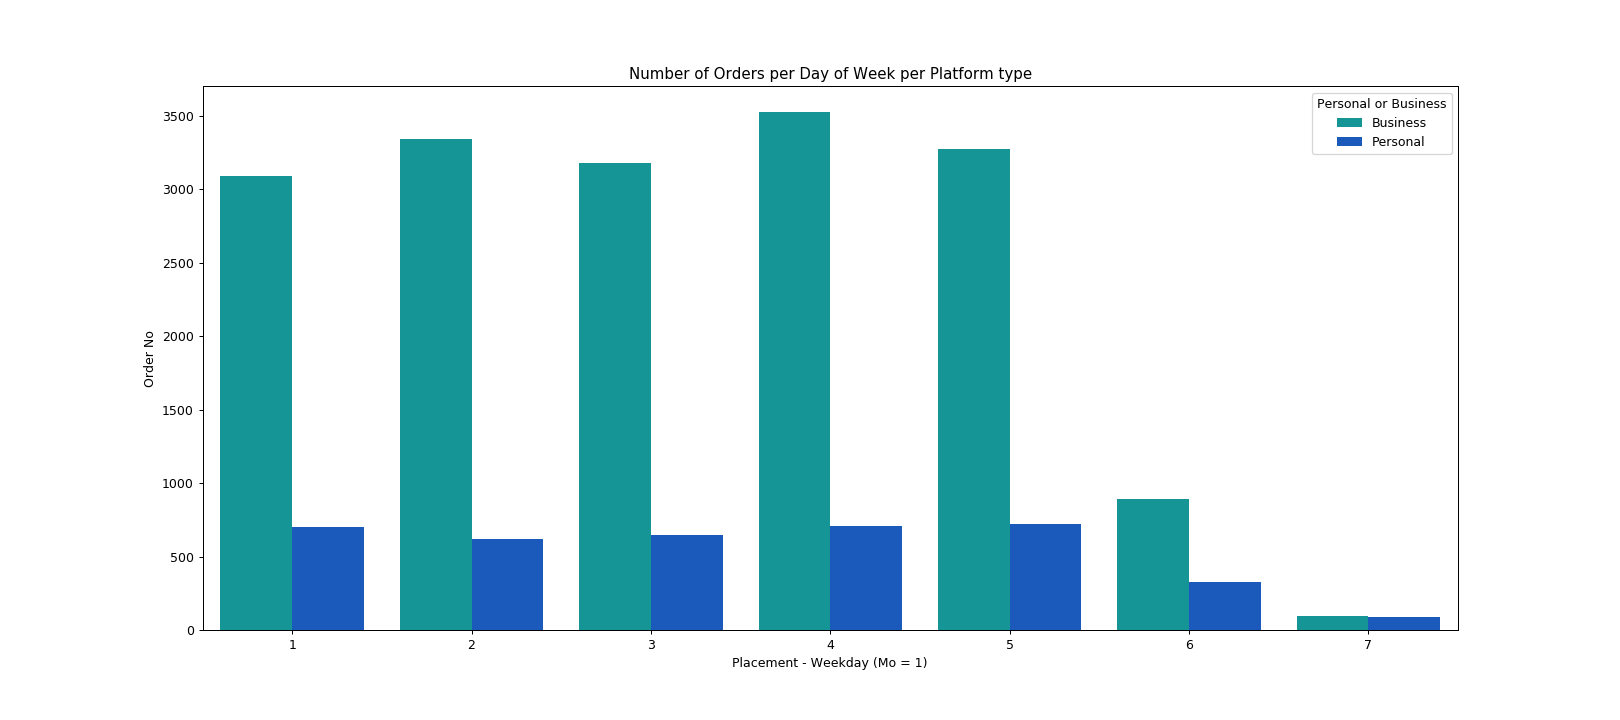

In [303]:
#Plotting bar graph of Number of Orders per Day of Week per Platform type

df = train.groupby(['Placement - Weekday (Mo = 1)','Personal or Business']).count().reset_index()
plt.figure(figsize =(18, 8))
plt.title('Number of Orders per Day of Week per Platform type')
sns.barplot(x = 'Placement - Weekday (Mo = 1)', y = 'Order No', data = df, hue = 'Personal or Business', palette='winter_r')


# Distance (km) covered per Platform type

### Platform 1-3  distance are driven roughly equally both business and personal customers. Platform 4 distance is driven soley by business as it is offered only to business customers

<IPython.core.display.Javascript object>


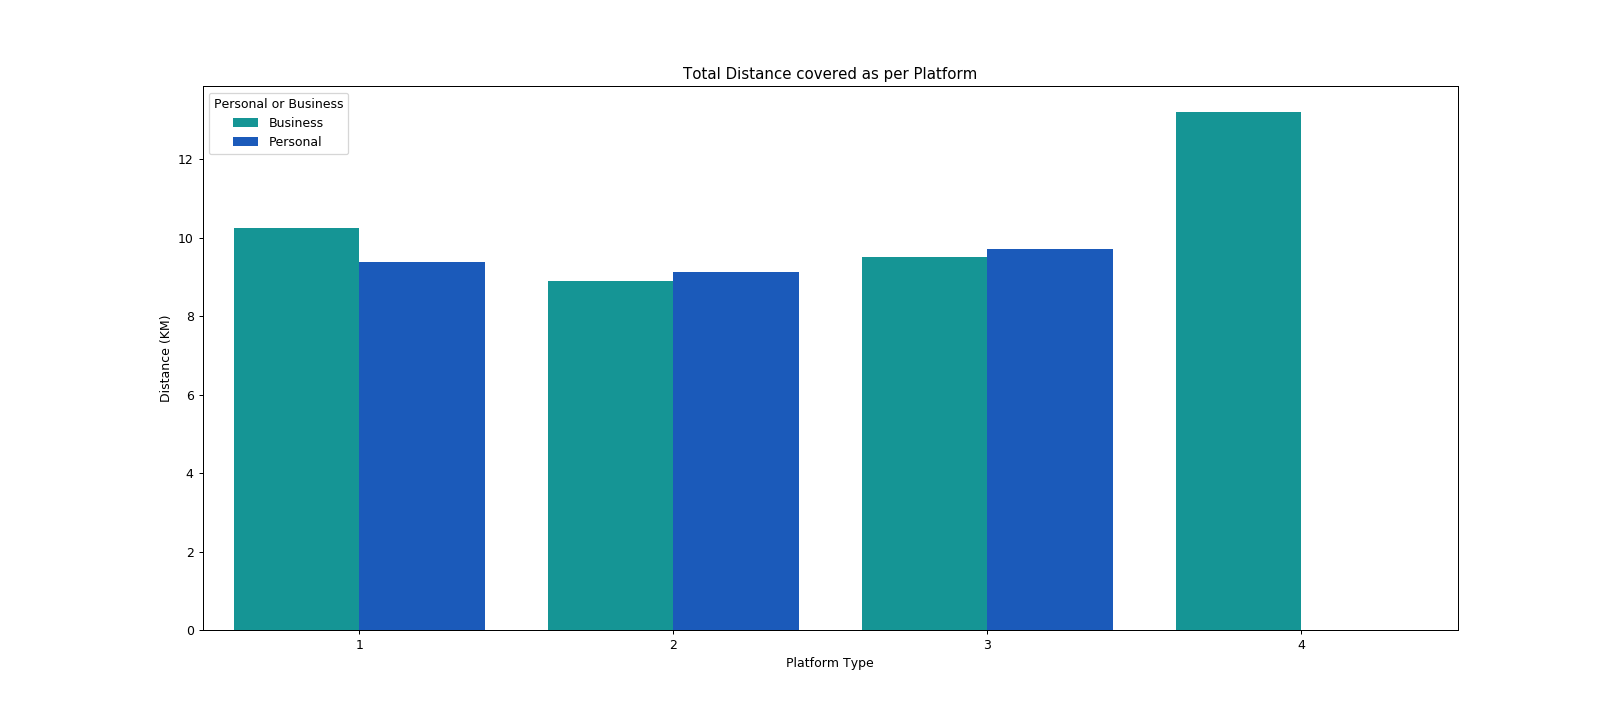

<function __main__.Total_distance()>

In [304]:
# Plotting bar graph of Distance (km) covered per Platform type

def Total_distance():
    plt.figure(figsize=(18, 8))
    plt.title('Total Distance covered as per Platform')
    sns.barplot(train['Platform Type'], train['Distance (KM)'], hue=train['Personal or Business'], palette='winter_r',ci=None)
    return Total_distance

Total_distance()

# Time from Pickup to Arrival per Platform type

### Platform 2 has the fastest time of busines customers and platform 1 has the shortest time of personal customers. Platform4 is only offered to business customers only.

<IPython.core.display.Javascript object>


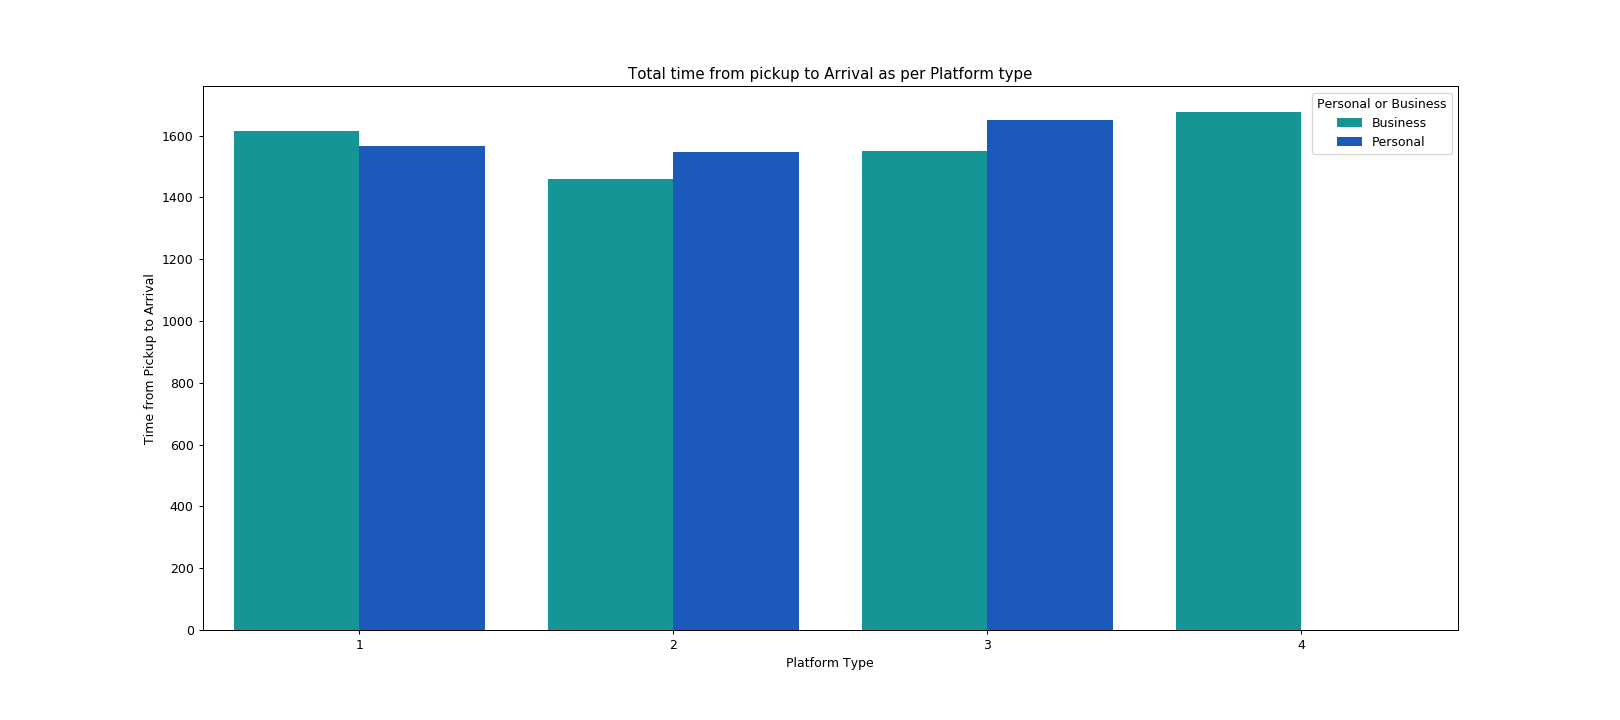

<function __main__.Total_time()>

In [305]:
# Plotting bar graph of Time from Pickup to Arrival per Platform type

def Total_time():
    plt.figure(figsize=(18, 8))
    plt.title('Total time from pickup to Arrival as per Platform type')
    sns.barplot(train['Platform Type'], train['Time from Pickup to Arrival'], hue=train['Personal or Business'], palette='winter_r', ci = None)
    return Total_time

Total_time()

# Time from Pickup to Arrival per Day of week


### This tells us there is a higher range of times from pick up to arrival on weekdays than weekends but the bulk of trips are still in the same roughly the same range, this may be due to traffic lower rate of traffic on weekends



<IPython.core.display.Javascript object>


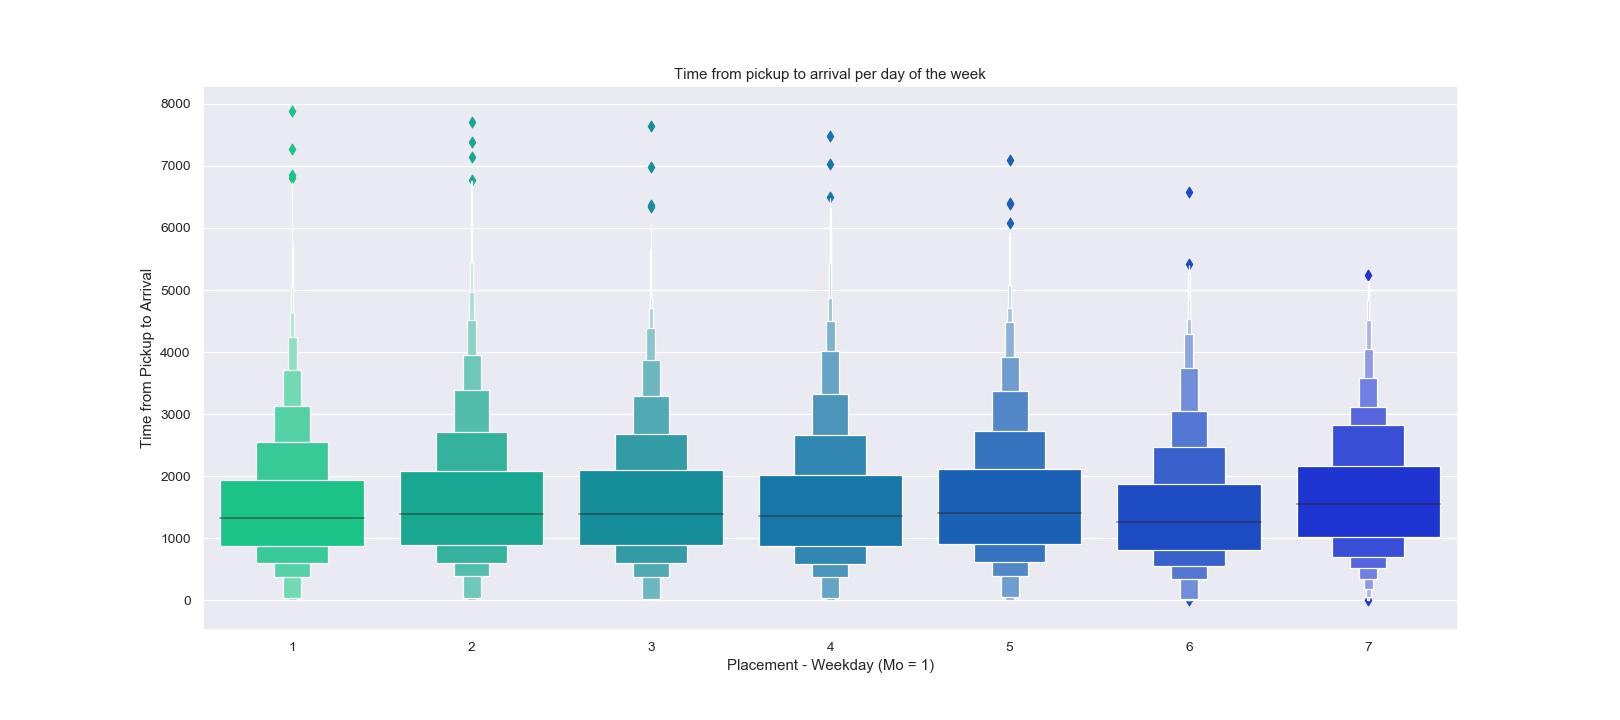

In [306]:
#Plotting bar graph of Time from Pickup to Arrival per Day of week
def Time_Pickup_Weekdays():
    sns.set(style="darkgrid")
    plt.figure(figsize=(18, 8))
    plt.title('Time from pickup to arrival per day of the week')
    sns.boxenplot(data=train, x='Placement - Weekday (Mo = 1)',y='Time from Pickup to Arrival', palette='winter_r')
    
Time_Pickup_Weekdays()

# Distribution between Placement and Confirmation Time per Hour of day

### Most orders and confirmation happen roughley between 06:00hrs and 20:00hrs and the largest difference between the confirmation time and order time happens 15:00hrs to 17:00hrs, perhaps but not definately due to traffic

<IPython.core.display.Javascript object>


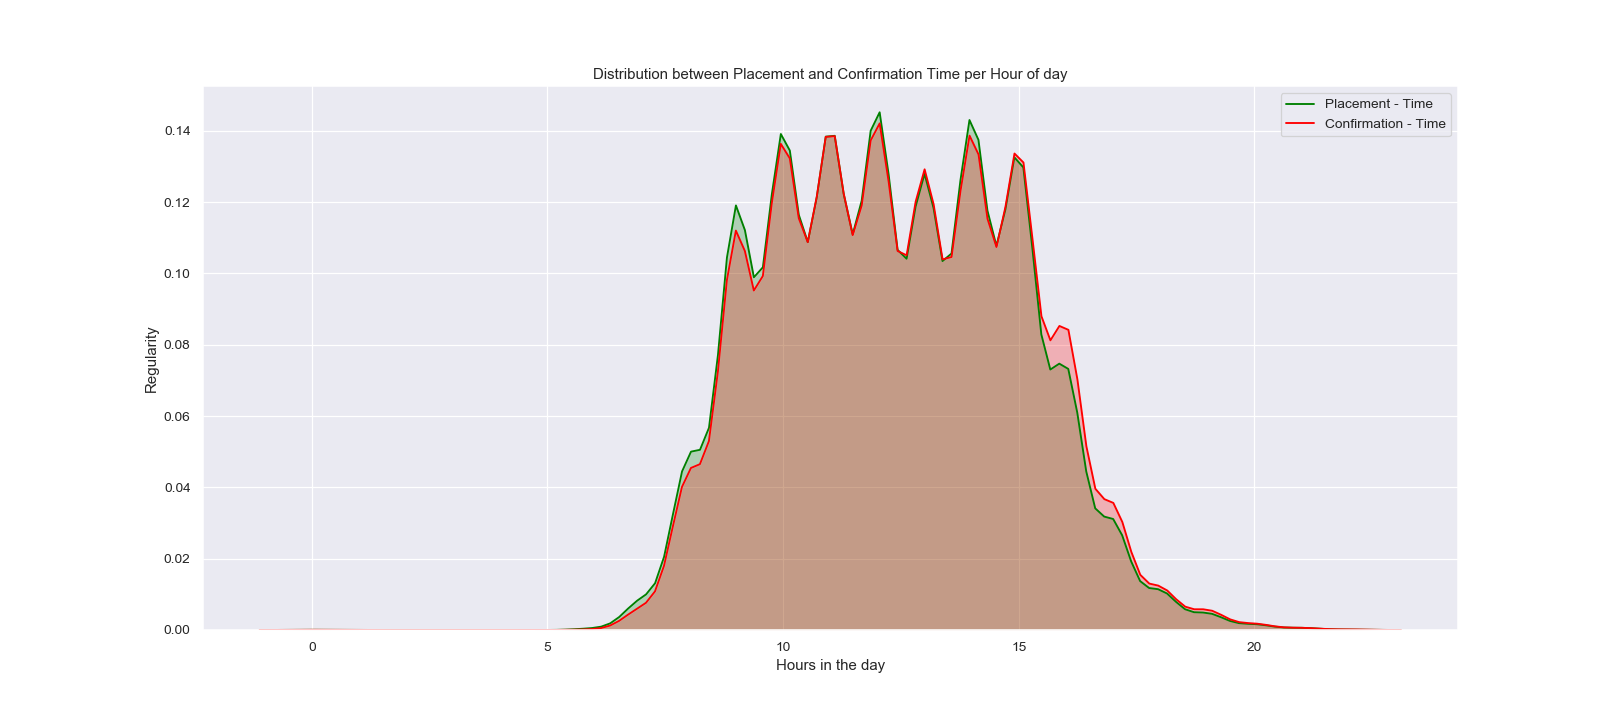

In [307]:

# Plotting kernel distribution estimate between Placement and Confirmation Time per Hour of day

def Distribution(x, y):
    v = pd.DataFrame(pd.to_datetime(train[x]))[x].dt.hour
    w = pd.DataFrame(pd.to_datetime(train[y]))[y].dt.hour
    plt.figure(figsize=(18, 8))
    plt.ylabel('Regularity')
    plt.xlabel('Hours in the day')
    plt.title('Distribution between Placement and Confirmation Time per Hour of day')
    sns.kdeplot(v, shade=True, color= 'green')
    return sns.kdeplot(w, shade=True, color= 'red')

Distribution('Placement - Time','Confirmation - Time')


# Distribution between Confirmation and Arrival at Destination Time per Hour of day

### confirmations and deliveries happen roughley between 06:00hrs and 20:00hrs and the differnce between the confirmation time confirmation and arrival time relatively constant distribution

<IPython.core.display.Javascript object>


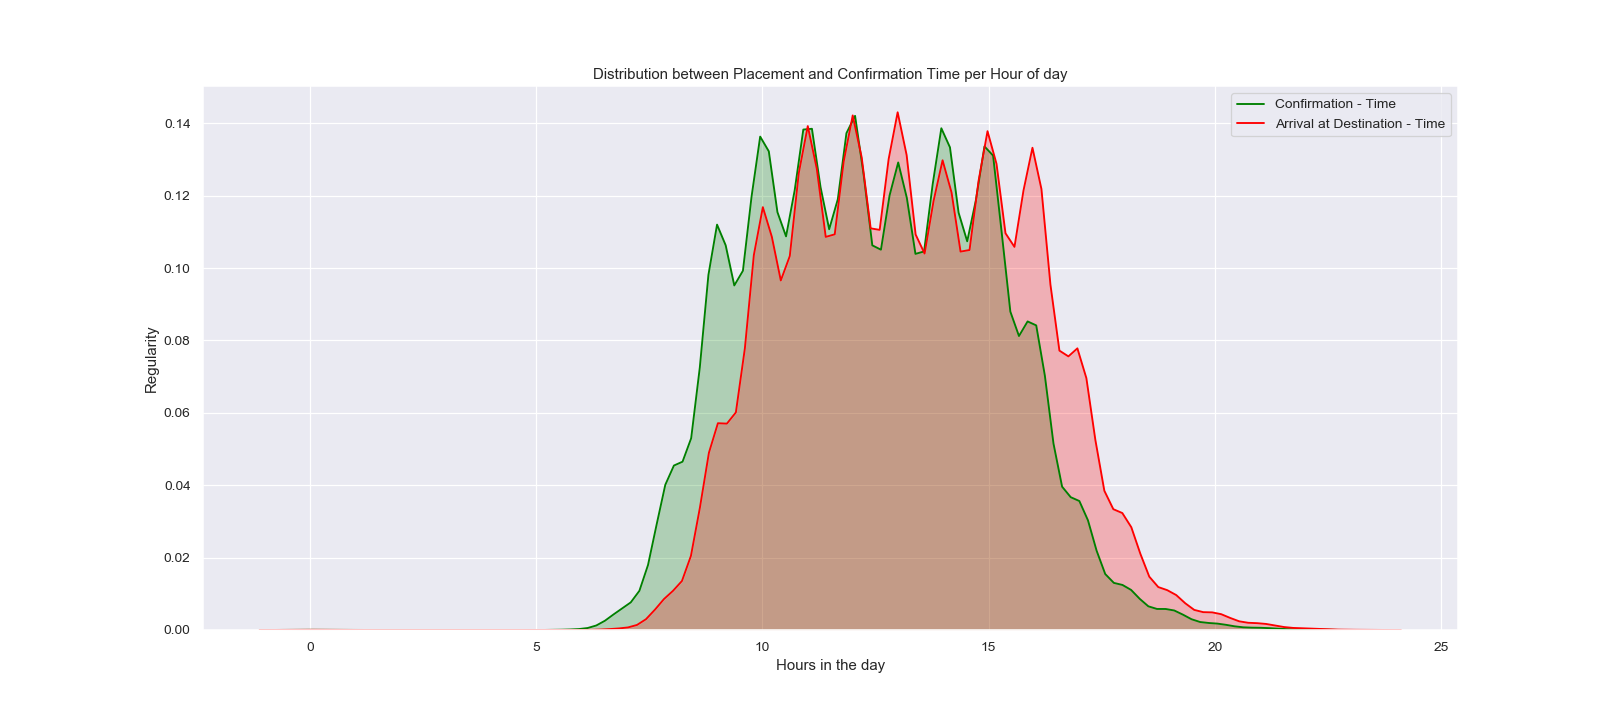

In [308]:

#Plotting Kernel distribution estimate between Confirmation and Arrival at Destination Time per Hour of day

def Distribution2(x, y):
    v = pd.DataFrame(pd.to_datetime(train[x]))[x].dt.hour
    w = pd.DataFrame(pd.to_datetime(train[y]))[y].dt.hour
    plt.figure(figsize=(18, 8))
    plt.ylabel('Regularity')
    plt.xlabel('Hours in the day')
    plt.title(' Distribution between Confirmation and Arrival at Destination Time per Hour of day')
    sns.kdeplot(v, shade=True, color= 'green')
    return sns.kdeplot(w, shade=True, color= 'red')

Distribution('Confirmation - Time','Arrival at Destination - Time')

# Number of orders per Average rating of Driver

### Most Drivers are rated between 12-15 and the bulk of high delivery drivers are rated at 14 


<IPython.core.display.Javascript object>


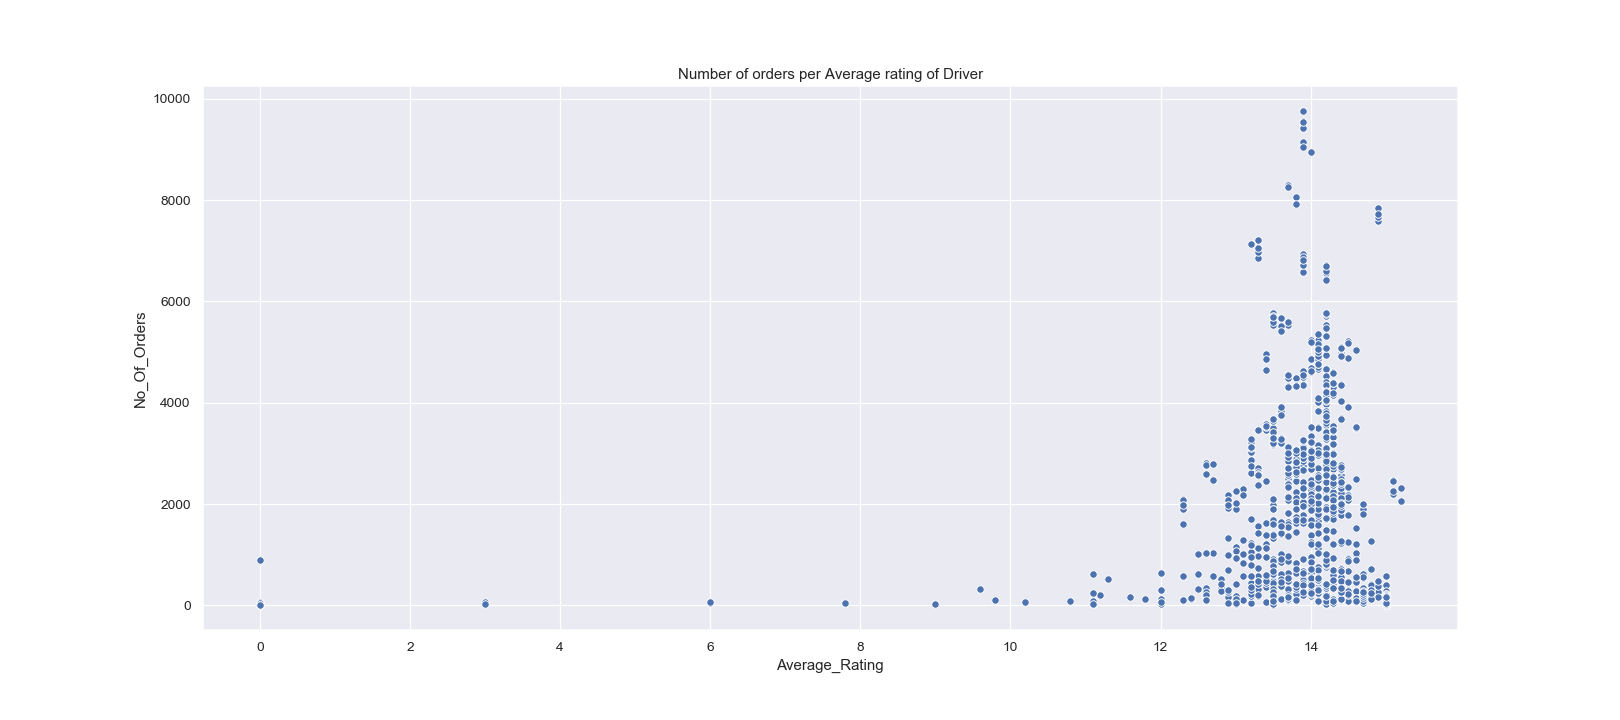

<function __main__.Order_numbers()>

In [309]:
#Plotting scatter plot of Number of orders per Average rating of Driver

def Order_numbers():
    plt.figure(figsize=(18, 8))
    plt.title('Number of orders per Average rating of Driver')
    sns.scatterplot(riders['Average_Rating'], riders['No_Of_Orders'], palette='winter_r',ci=None)
    return Order_numbers

Order_numbers()


# Time form pickup to Arrival per Distance (km)


### There appears to be correlation between distance to order and time to deliver and most order density is to occur between 0- 15km

<IPython.core.display.Javascript object>


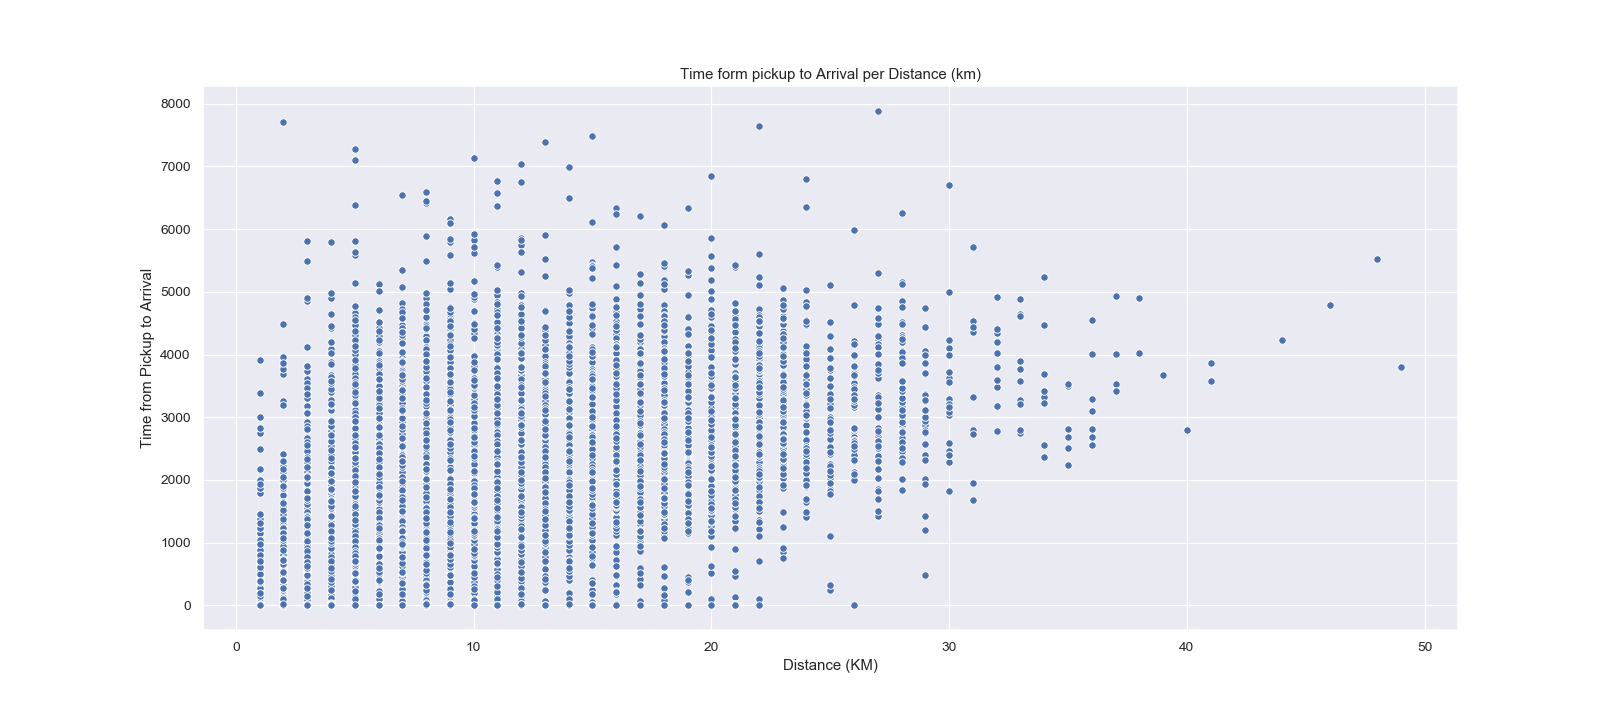

<function __main__.Total_time2()>

In [310]:

#Plotting scatter plot of  Time form pickup to Arrival per Distance (km)

def Total_time2():
    plt.figure(figsize=(18, 8))
    plt.title('Time form pickup to Arrival per Distance (km)')
    sns.scatterplot(train['Distance (KM)'], train['Time from Pickup to Arrival'], palette='winter_r',ci=None)
    return Total_time2

Total_time2()


### Explore column-to-column relations 
To use linear regression for modelling,its necessary to remove features that are not correlated to each other. It is good to get a glimpse of which features are strongly correlated at an expoloatory level. Let's have a look at a display of the correlated features of the train dataset:

<IPython.core.display.Javascript object>


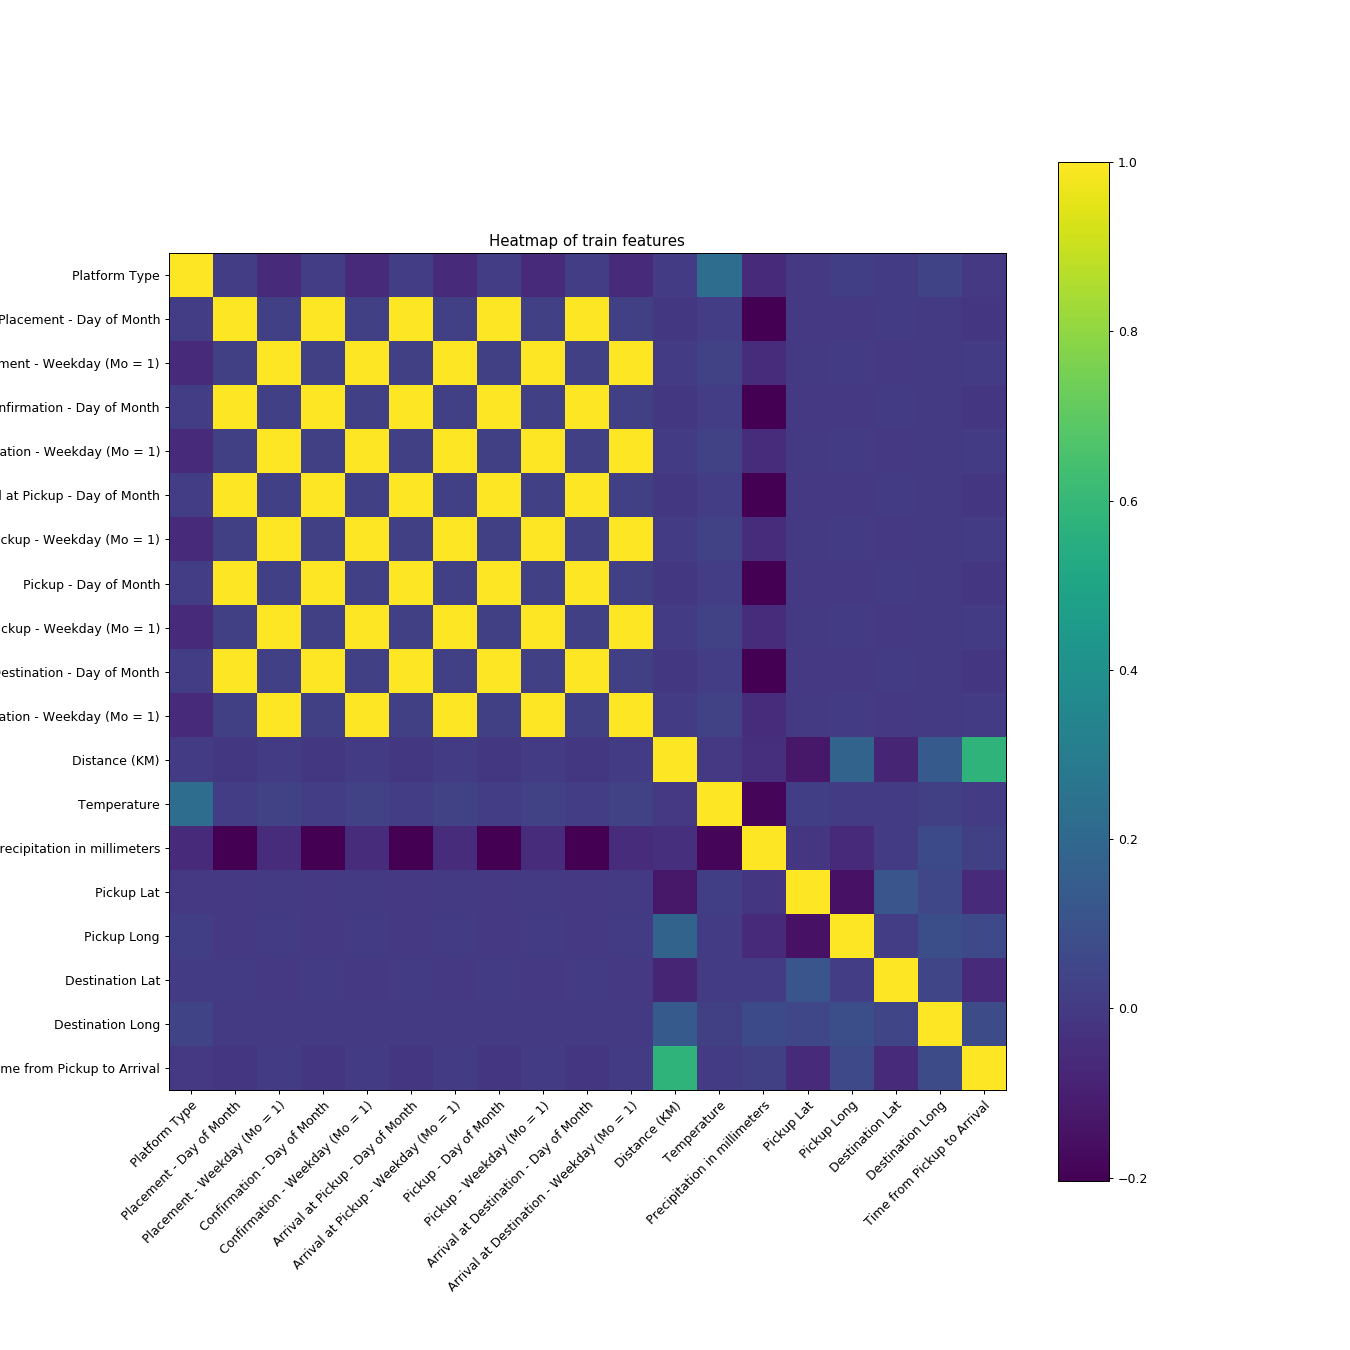

Text(0.5, 1.0, 'Heatmap of train features')

In [129]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = ax.imshow(corr)
plt.colorbar(heatmap)
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
ax.set_title("Heatmap of train features")


#### Observations:
- It is notable that the target variable `Time from Pickup to Arrival` has a fairly strong positive correlation to `Distance(KM)` at around 50-60%, followed by weakened correlation to other predictor variables. 


In [130]:
#sns.pairplot(train)

### Merge riders to test and train data

We noticed that the dataset for `riders` and `train` had a common feature named `Rider Id`. To work with the dataset efficiently we merged the two datsets and obtained a new merged dataframe called `merged_train`. The same needs to happen with the `test` data for the model obtained from the train data will be tested on that data. Hence, there there is another merged data called `merged_test`.

In [131]:
# merging train with riders and test with riders on 'Rider id'
merged_train = pd.merge(train, riders, on="Rider Id", how="left").copy()
merged_test = pd.merge(test, riders, on="Rider Id", how="left").copy()

In evaluating the merged datsets we look at their new shape to note whether the merged worked as it should.

In [132]:
# The (rows ,columns) of the merged_train dataframe:
merged_train.shape

(21201, 33)

In [133]:
# The (rows ,columns) of the merged_test dataframe:
merged_test.shape

(7068, 29)

We can see that the train dataset rows have remained at 21201 as expected, asnd the columns are now 33. On the other hand, the test dataset has 7068 rows and 29 columns. 

### Data Preprocessing 

Now that the data train and test datasets has been merged, we preprocessed the data so that it can implemented for creating the model that will estimate the arrival time from pick up to destination.

***We start off with identifying and handling missing values in both the merged train  and merged test data***

In [134]:
# Checking the null values from the merged_train data
merged_train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

We saw from the analysis of data that the were missing values from two columns in the both the test and train datasets:
<br> `Temperature` column has 4366 missing values while `Precipitation in millimeters` has 20649.
In consequence, we decided to fill the missing values in the Temperature column with the mean of the temperatures.


In [135]:
# Filling the missing values in values Temperature column with the on both the train and test data.
merged_train['Temperature'] = merged_train['Temperature'].fillna( merged_train['Temperature'].mean())
merged_test['Temperature'] = merged_test['Temperature'].fillna( merged_test['Temperature'].mean())

When investigating the missing values in Precipitation in millimeters column, we first summed up the values of the of the null values and computed the percentage of the missing values. 



In [136]:
# Proportion of missing values in the Precipitation in millimeters column.
missing_vals = merged_train['Precipitation in millimeters'].isnull().sum()
# compute the percentage of the missing values.
miss_val = round((missing_vals/len(merged_train.index))*100,0)
print(f'The missing values of the Precipitation in millimeters is {miss_val} %.')

The missing values of the Precipitation in millimeters is 97.0 %.



We can see from the `Precipitation in millimeters` column that only 552 records have values, so we analyse these 552 records we have. From these records we look whether are the values of zero which will represents days that have no precipitation. We note that that there are no values like that. 

In [137]:
# Make a copy of the merged_train data.
precipitation = merged_train['Precipitation in millimeters'].copy()
# We drop column if it has nan values. 
precipitation.dropna(inplace = True)
# We want to check if whether the available records we have contain Zeros for when 
# there was no rainfall/precipitation at the time of the delivery.
precipitation[precipitation==0].count()

0

Considering days that have no precipation, we decided to fill these null values with zero. 

In [138]:
# Filling missing values in Precipitation column with 0 on both train and test data
merged_train['Precipitation in millimeters'] = merged_train['Precipitation in millimeters'].fillna(0)
merged_test['Precipitation in millimeters'] = merged_test['Precipitation in millimeters'].fillna(0)

After filling the null values with zero we check the null values from both the train and test data.

In [139]:
# Checking if all missing values have been handled
merged_train.isnull().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

In [140]:
# Checking missing values in merged_test
merged_test.isnull().sum()

Order No                                0
User Id                                 0
Vehicle Type                            0
Platform Type                           0
Personal or Business                    0
Placement - Day of Month                0
Placement - Weekday (Mo = 1)            0
Placement - Time                        0
Confirmation - Day of Month             0
Confirmation - Weekday (Mo = 1)         0
Confirmation - Time                     0
Arrival at Pickup - Day of Month        0
Arrival at Pickup - Weekday (Mo = 1)    0
Arrival at Pickup - Time                0
Pickup - Day of Month                   0
Pickup - Weekday (Mo = 1)               0
Pickup - Time                           0
Distance (KM)                           0
Temperature                             0
Precipitation in millimeters            0
Pickup Lat                              0
Pickup Long                             0
Destination Lat                         0
Destination Long                  

We note that the data no longer has null values. Now, we proceed to observed the features in our merged datasets.

In [141]:
# The column labels of the merged_train dataframe. 
merged_train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings'],
      dtype='object')

In [142]:
# The column labels of the merged_train dataframe. 
merged_test.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'],
      dtype='object')

In observing the columns, we want the `Time from Pickup to Arrival` to be last column, which will make our work a little bit easier thus we rearrange these columns:

In [143]:
# Alignment of Dataset so we can 'Time from Pickup to Arrival' as the last column of the dataframe:

merged_train = merged_train[['Order No', 'User Id', 'Vehicle Type',
       'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings',
       'Time from Pickup to Arrival']]  


In [144]:
# View of the first 5 columns of the merged_train datatset with 'Time from Pickup to Arrival' as last column:
merged_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,396,339,13.6,69,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,1023,242,12.5,114,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,886,283,14.5,113,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,2311,872,14.1,533,1214


This merged data is now analysed using visual aid. 

<IPython.core.display.Javascript object>


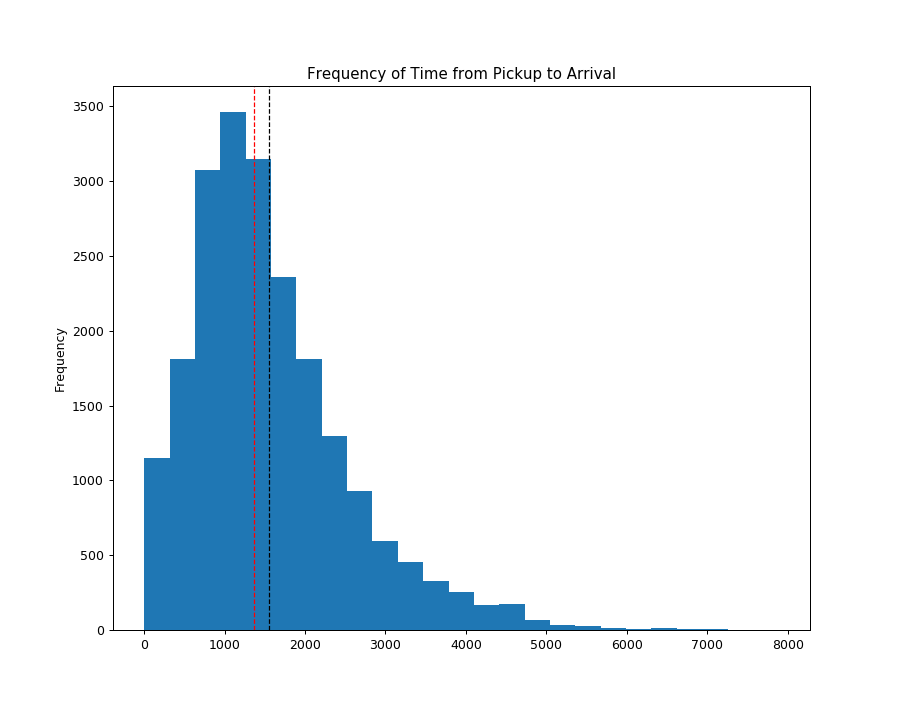

In [145]:
# We start with checking the distribution of the target variable
plt.figure(figsize=[10,8])
plt.hist(train['Time from Pickup to Arrival'], bins=25)
plt.gca().set(title='Frequency of Time from Pickup to Arrival', ylabel='Frequency')
plt.axvline(train['Time from Pickup to Arrival'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.axvline(train['Time from Pickup to Arrival'].median(), color='red', linestyle='dashed', linewidth=1)

We see that the target variabe `Time from Pickup to Arrival` is not normally distrubuted since its ditribution is positively skewed, another property of a positively skewed distribution is that the mean(black dashed line) is greater than the median(red dashed line) as seen in the plot

<IPython.core.display.Javascript object>


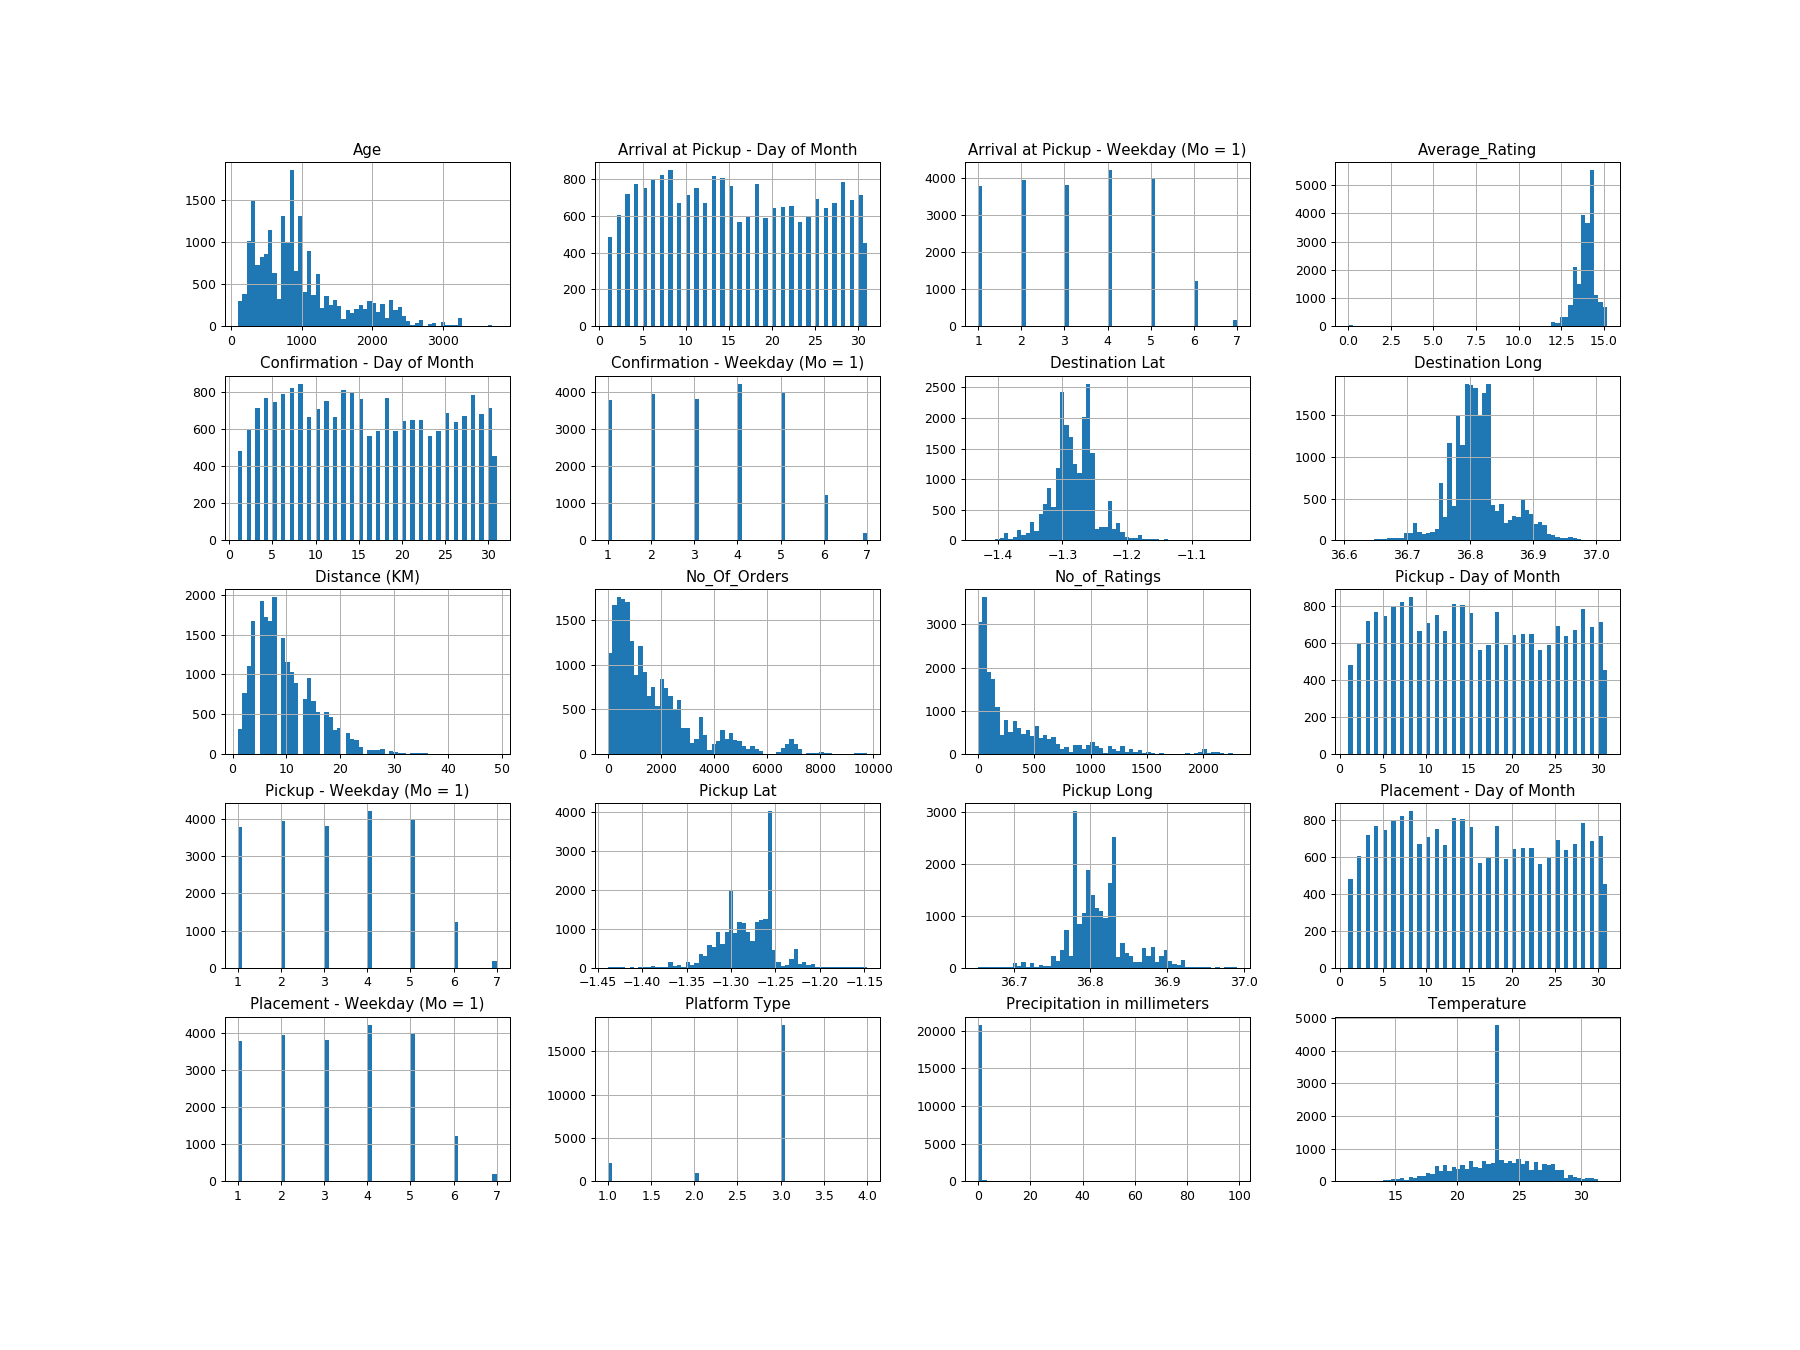

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B47625C6C8>,
      dtype=object)

In [146]:
# Checking the distributions of the predictor variables
merged_train.drop(['Time from Pickup to Arrival'], axis = 1).hist(bins=60, figsize=(20,15))


#### Key observations:
- Platform type 3 is the most prefered.
- Placement, confirmation and pickup day of the month indicates that majority of orders are made at the beginning and towards the end of the month.
- These orders are mainly made on weekdays as shown by weekday data. 
- Distance data is postively skewed, majority of orders are at short distance. Peaking at around 2000 for 6-7 kilometers.
- Temperature is normal distributed, with an expected peak around the mean as we resolved the missing values by mean.
- As expected, the precipitations follows the same trend as temperature, indicating a peak around the value we resolved the missing values by. In this case, it is zero. 
- Latitutides and longitutes are more centered around the mean. 
- No. of orders, Age and No. of ratings indicates positive skewness with an evidence of outliers. 
- Drivers received ratings between 12 and 15.
- All in all, the target variable is positively skewed, with majority of driveriver arriving at the destination within 23 min from the pickup point.

### Variable Selection by correlation and significance ##

- We have more predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the Time from Pickup to Arrival and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

- We also need to consider how significant those features are.

- The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame

In [147]:
# Calculate correlations between predictor variables and the response variable
corrs = merged_train .corr()['Time from Pickup to Arrival'].sort_values(ascending=False)
corrs

Time from Pickup to Arrival             1.000000
Distance (KM)                           0.580608
Destination Long                        0.070425
Pickup Long                             0.060285
Confirmation - Weekday (Mo = 1)         0.009744
Arrival at Pickup - Weekday (Mo = 1)    0.009744
Pickup - Weekday (Mo = 1)               0.009744
Placement - Weekday (Mo = 1)            0.009693
Temperature                             0.005772
No_of_Ratings                           0.005609
Precipitation in millimeters            0.005495
Platform Type                          -0.003827
Age                                    -0.007969
Pickup - Day of Month                  -0.014701
Arrival at Pickup - Day of Month       -0.014701
Confirmation - Day of Month            -0.014701
Placement - Day of Month               -0.014710
No_Of_Orders                           -0.041608
Average_Rating                         -0.042559
Pickup Lat                             -0.053823
Destination Lat     

<IPython.core.display.Javascript object>


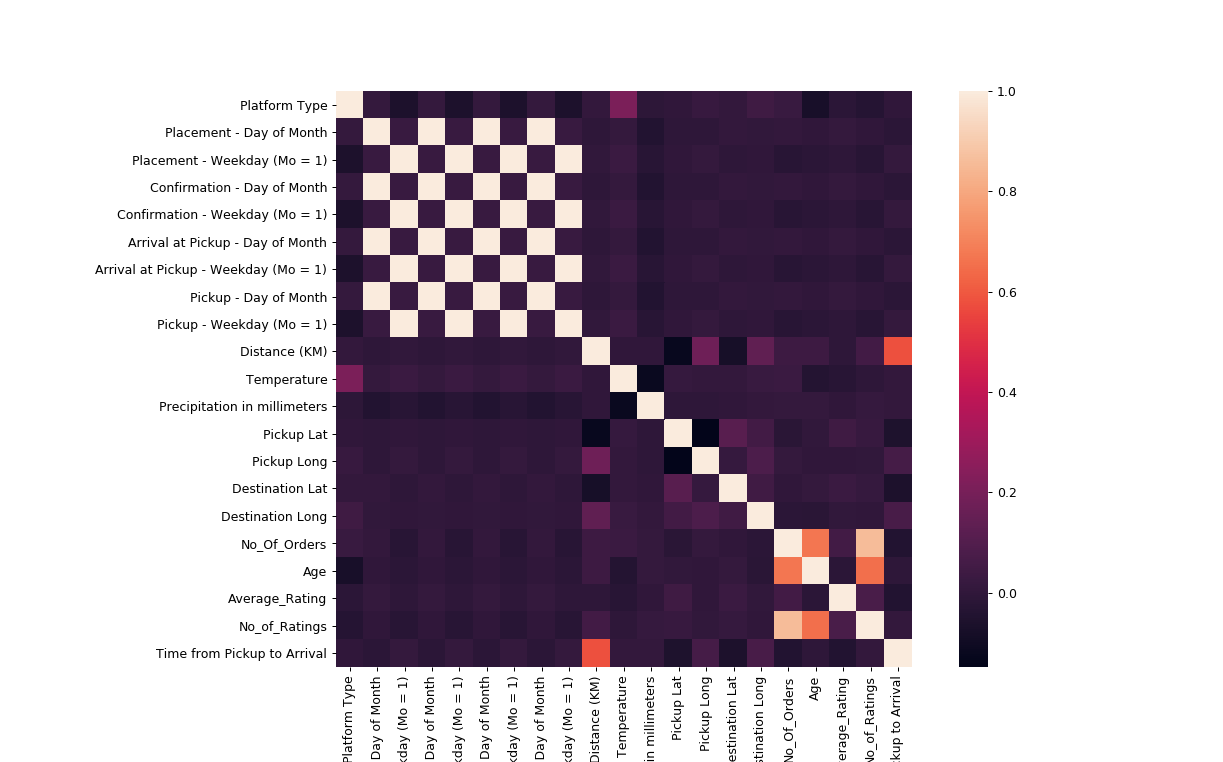

In [148]:
# Visualize the correlation using a heat map
plt.figure(figsize=(18, 10))
sns.heatmap(merged_train.corr(), square=True, annot = False)


#### Observations:
- There exists a fairly strong relationship between merged predictor variables this phenomenon is known as multicollinearity, This is problem because linear models requires the features to be independent.
- We will investigate the correlation further using the p-values.

In [149]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(merged_train [col], merged_train ['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Distance (KM),0.580608,0.000000
Average_Rating,-0.042559,0.000000
No_Of_Orders,-0.041608,0.000000
Pickup Lat,-0.053823,0.000000
Destination Lat,-0.061872,0.000000
Pickup Long,0.060285,0.000000
Destination Long,0.070425,0.000000
Placement - Day of Month,-0.014710,0.032205
Pickup - Day of Month,-0.014701,0.032312
Arrival at Pickup - Day of Month,-0.014701,0.032312


On the heatmap above we can see a lot of variables being highly corelated with each other. However, we are dropping all the predictors that are highly correlated with each other based on the heat map above because they have no significant relation with the required feature which will be used for our prediction. 

In [150]:
#dropping highly correlated predictors and the ones that were not selected above.
merged_train = merged_train.drop(['Placement - Weekday (Mo = 1)', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)',
                                  'No_of_Ratings','No_Of_Orders','Average_Rating'], axis = 1)

merged_test = merged_test.drop(['Placement - Weekday (Mo = 1)', 'Placement - Weekday (Mo = 1)','Confirmation - Day of Month','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Day of Month','Arrival at Pickup - Weekday (Mo = 1)','Pickup - Day of Month','Pickup - Weekday (Mo = 1)',
                                'No_of_Ratings','No_Of_Orders','Average_Rating'], axis = 1)


#dropping obect columns which we can not use on our model
merged_train = merged_train.drop(['User Id','Vehicle Type','Rider Id',
                                  'Confirmation - Time', ], axis = 1)

merged_test = merged_test.drop(['User Id','Vehicle Type','Rider Id', 
                                'Confirmation - Time'], axis = 1)

merged_train.drop(['Placement - Time','Arrival at Pickup - Time','Pickup - Time','Order No'], axis = 1, inplace = True)
merged_test.drop(['Placement - Time','Arrival at Pickup - Time','Pickup - Time','Order No'], axis = 1, inplace = True)

# Viewing the new dataset of the left columns that were not dropped. 
merged_train.head()


,Platform Type,Personal or Business,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Age,Time from Pickup to Arrival
0,3,Business,9,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,1309,745
1,3,Personal,12,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,339,1993
2,3,Business,30,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,242,455
3,3,Business,15,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,283,1341
4,1,Personal,13,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,872,1214


In [151]:
# We note that the columns fom the merged_trained dataframe have dropped from 30 to 16. 
merged_train.shape

(21201, 12)

#### Creating a copy of both the datasets
It's always good practice to make copies when making changes to the datasets so that if something breaks we don't have to start over from the begining

In [152]:
# Copy of the test and train datasets.
merged_train_copy = merged_train.copy()
merged_test_copy = merged_test.copy()


## Encoding the categorical data ##
 - Bussiness column is a categorical data and needs to be manipulated. This can be done by using the `pandas.get_dummies()` which converts categorical data into dummy or indicator variables.


In [153]:
# We view the merged_train dataframe to see that the 'Personal or Business' is a categorical data. 
merged_train.head(2)

,Platform Type,Personal or Business,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Age,Time from Pickup to Arrival
0,3,Business,9,4,20.4,0.0,-1.317755,36.830370,-1.300406,36.829741,1309,745
1,3,Personal,12,16,26.4,0.0,-1.351453,36.899315,-1.295004,36.814358,339,1993


We then manipulate this data so that it can be numerical as the other featured in the above dataframe.

In [154]:
# Implementing the pd.get_dummies method for both test set and train set
merged_train= pd.get_dummies(merged_train,columns = ['Personal or Business'], drop_first=True)
merged_test = pd.get_dummies(merged_test,columns = ['Personal or Business'], drop_first=True)

In [155]:
# View the merged train with only numerical data.
merged_train.head()

,Platform Type,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Age,Time from Pickup to Arrival,Personal or Business_Personal
0,3,9,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,1309,745,0
1,3,12,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,339,1993,1
2,3,30,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,242,455,0
3,3,15,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,283,1341,0
4,1,13,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,872,1214,1


In [156]:
# View the merged train with only numerical data.
merged_test.head()

,Platform Type,Placement - Day of Month,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Age,Personal or Business_Personal
0,3,27,8,23.24612,0.0,-1.333275,36.870815,-1.305249,36.822390,1511,0
1,3,17,5,23.24612,0.0,-1.272639,36.794723,-1.277007,36.823907,273,0
2,3,27,5,22.80000,0.0,-1.290894,36.822971,-1.276574,36.851365,460,0
3,3,17,5,24.50000,0.0,-1.290503,36.809646,-1.303382,36.790658,560,0
4,3,11,6,24.40000,0.0,-1.281081,36.814423,-1.266467,36.792161,1120,0


# Model Selection

From this point on forth our goal is find the model with be best accuracy, To do this we will build several models and commpare their rmse and find out which one performs best

In [159]:
# Create the X and y metrics:
X = merged_train.drop(['Time from Pickup to Arrival','Age'], axis = 1)
X_test = merged_test.drop(['Age'],axis = 1)
y = np.array(train['Time from Pickup to Arrival']).reshape(-1,1)

## Scaling the data and creating scaled X and scaled y data

In [174]:
# creating instance for scaled X and  scaled y
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

### Base Model
Which for the rest of the notebook we will be improving on

In [161]:
# Splitting our train data into train 70% train and 30% validation set
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.30,
                                                  random_state = 25)

In [175]:
# Splitting our scalled train data into scalled train 70% train and 30% validation set
X_train_sc, X_val_sc, y_train_sc, y_val_sc = train_test_split(X_scaled,y_scaled,test_size = 0.3)

In [163]:
# Create a LinearRegression() instance with all the default parameters.
lin_reg = LinearRegression() 
# Traning the linear regression model using the .fit() function.
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
# Using the linear model to predict the validation response variable from the validation dataset obtained from the Test-split data.
val_pred = lin_reg.predict(X_val)
val_pred

array([[2042.76865557],
       [1415.87781663],
       [2050.18185505],
       ...,
       [1093.6552803 ],
       [1023.72502374],
       [1561.67252544]])

Having predicted the time arrival for the base models. It is important to evaluate to evaluate the performance of the model by comparing the measured and modelled values. To achieve this, the sklearn module is able to use error metrics to assess the fit of our model. The most popular statistical metrics include **Residual Sum of Squares (RSS)**, **Mean Squared Error (MSE)**, **R squared (R^2)**, and **Root Mean Squared Error (RMSE)**. Here is the formulation of the RMSE:

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$



$$RMSE = \frac{1}{n}\sum_{i=1}^n \sqrt{(y_i-\hat{y}_i)^2} $$

In [173]:
# function that calculates the root mean squared error
def rmse(y_test,y_prediction):
    '''
    This function calculates the root mean squared error which we will be using to check
    the accuracy of our models
    
    Params
    ------------
    y_test : The actual y values
    y_prediction : The predicted y values we get from out model
    
    '''
    result = np.sqrt(mean_squared_error(y_test,y_prediction))
    return result

In [166]:
# We use the function to obtain the RMSE of the Base Model.
rmse(y_val, val_pred)

793.3028821523337

In [167]:
# Making actual y predictions for the test dataset
y_pred = lin_reg.predict(X_test)

<IPython.core.display.Javascript object>


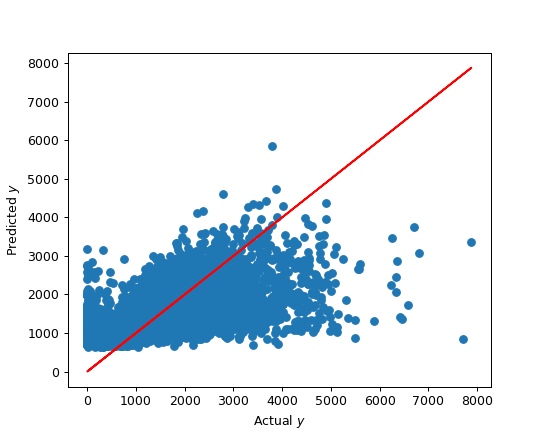

In [168]:
# Linear model Visual
plt.scatter(y_val,val_pred) # The scatter plot
plt.plot(y_val,y_val,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

In [169]:
# Create a Dataframe suitable for submission to Zindi.
# This model has the time of arrival estimated by the base model. 
submission = test[['Order No']].copy()
submission['Time from Pickup to Arrival'] = y_pred

In [170]:
# dataframe to be submitted to Zindi. 
submission

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1307.746708
1,Order_No_12736,1109.207739
2,Order_No_768,1055.041384
3,Order_No_15332,1103.354981
4,Order_No_21373,1195.624103
...,...,...
7063,Order_No_3612,1130.460822
7064,Order_No_7657,2936.028198
7065,Order_No_1969,1654.064536
7066,Order_No_10591,2611.834259


In [171]:
# The Dataframe is saved as a csv file titled 'submission_0.11'
# submission.to_csv('submission_0.1.csv', index = False)

## Comparing models
Since we're going to be building different models and comparing them we start with creating a function that will help us compare these models

In [177]:
def best_perfomance(model_result,best_result):
    ''' This functions checks if whether the last model we build perfoms better compared our
    best perfoming models by comparing their RMSE score'''
    if model_result < best_result:
        print('This is now the best perfoming model, with RMSE of {}'.format(model_result))
    
    elif model_result == best_result:
        print('This model performance just as good as the previous best performing model with RMSE of {}'.format(model_result))
        
    else:
        print('This model performs poorly compared the previous best performing model')
        print('Best perfomaning model score: {}'.format(round(best_result,4)))
        print('Model result : {}'.format(round(model_result,4)))
# setting the inital score of the out base model as the best result
best_result = 793.3028821523337

### Catboost Regressor

The CatBoost library can be used to solve both classification and regression problems. For classification, you can use `CatBoostClassifier` and for regression, `CatBoostRegressor`. In this project we focused on working with the `CatBoostRegressor`. Using the jupyter notebook command we used `pip install catboost` to install the CatBoost in Python.

In [178]:
# creating an instance of the catboostregressor
cbr_model = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)

In [179]:
# training the catboost regressor model
cbr_model.fit(X_train, y_train)

0:	learn: 839.4022581	total: 182ms	remaining: 182ms
1:	learn: 825.4788909	total: 185ms	remaining: 0us


In [180]:
# predictions on the validation set
val_pred = cbr_model.predict(X_val)
val_pred

array([2238.25652059, 1395.6549036 , 2238.25652059, ..., 1395.6549036 ,
        736.31988701, 1395.6549036 ])

In [181]:
model_result = rmse(y_val, val_pred)

In [182]:
# Checking the model performance
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 793.3029
Model result : 812.3998


<IPython.core.display.Javascript object>


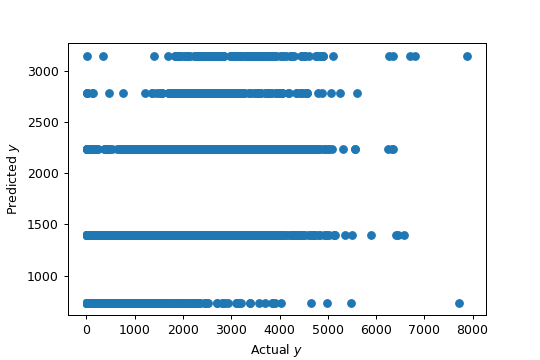

In [183]:
plt.scatter(y_val,val_pred) # The scatter plot
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

### Random Forest Regressor

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression. In this project we use the the random forest in a method of regression. Random forest is a bagging technique and not a boosting technique

<p><img src="./image/Random Forest.PNG" alt="Sendy Logistics Logo"></p>

From the Fig. we notice the trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

In [184]:
# creating a random forest regressor instancce
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [185]:
# Fitting Random Forest Regression model to the training data
regr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [186]:
# making predictions for the valdiation set
regr.predict(X_val)

array([2044.40419148, 1442.01754556, 2069.90089065, ..., 1280.03573814,
        800.63652348, 1447.48387118])

In [187]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val,regr.predict(X_val))

In [188]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 793.3029
Model result : 805.0174


### Decision Tree Regressor

Just like the the other models used so dar in this chanllenge, the Decision Tree can be used both in classification and regression problem (i.e. Decision trees can handle both categorical and numerical data). Decision trees are predictive models that use a set of binary rules to calculate a target value.

In [189]:
# creating an instance of the DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state = 0)

In [190]:
# training the model
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [191]:
# prediction of the validation set
tree_model.predict(X_val)

array([1188., 2157., 2270., ..., 1126.,  773., 1236.])

In [192]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, tree_model.predict(X_val))

In [193]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 793.3029
Model result : 1107.6072


One of the important reason of feature scaling is so that one significant number doesn't impact the model because of their large magnitude. Thus, feature scaling is one of the most critical step in machine learning during the preprocessing data before creating the a machine learning model. There are several techniques of scaling and the one used in this work is known as Normalization. Normally this technique is used when we want to bound the values between two numbers, that are often between 0 to 1, or -1 to 1. The diagram below shows how the data looks like after it has been scaling it in the X-Y plane.

### Support Vector Regression
The Support Vector Machines (SVM) is popularly and widely used for classification problems in machine learning.

In [194]:
# The support vector regression model requires scaled data
# creating instance for scaled X and  scaled y
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y)


In [195]:
# splitting the scaled data in to training set and validation set
X_train_sc, X_val_sc, y_train_sc, y_val_sc = train_test_split(X_scaled,y_scaled,test_size = 0.3)

In [196]:
# Training the SVR model
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train_sc, y_train_sc)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [197]:
# making preditions on the validation test
val_pred = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_val_sc)))

In [198]:
# Assign the RMSE to a variable called model_result
model_result= rmse(y_val_sc, val_pred)

In [199]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 793.3029
Model result : 2289.4794


### XGBoost Regression

XGBoost is an ensemble model. Ensemble Learning uses a number ML models to build a more efficient learning algorithms to improve the accuracy and the performance of the prediction of the model.

In [201]:
# creating a Xgboost regressor instancce
model_x=XGBRegressor()

In [202]:
# Training a Xgboost model
model_x.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [203]:
# Making predictions of the validation data
model_x.predict(X_val)

array([2078.7148, 2590.004 , 2434.4675, ..., 1465.7047, 1132.9927,
       1366.9655], dtype=float32)

In [204]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, model_x.predict(X_val))

In [205]:
# Cheking the performance
best_perfomance(model_result, best_result)

This is now the best perfoming model, with RMSE of 786.5398339170193


The XGBoost Regression model is now the best performing model

In [206]:
# assigning the best score to the best_result variable
best_result = 786.5398339170193

### Gradient Boosting Regressor

Gradient boosting is a ML technique for regression and classification problems as so as the other mentioned models above,however, it differs by its production of a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The Gradient boosting is one of the most powerful techniques for building predictive models. Here is it used in a regression manner:

In [207]:
# creating an instance for the gradient boosting regressor
Gbr_model= GradientBoostingRegressor()

In [208]:
# training the Gbr_model
Gbr_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [209]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, val_pred)

In [210]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 786.5398
Model result : 1229.8267


In [212]:
# make actual y target variable predictions on the test data
X_test
y_gbr_pred = Gbr_model.predict(X_test)

In [213]:
submission_gbr = test[['Order No']].copy()
submission_gbr['Time from Pickup to Arrival'] = y_gbr_pred

In [214]:
submission_gbr

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1454.271759
1,Order_No_12736,1284.804529
2,Order_No_768,1221.508333
3,Order_No_15332,1323.956210
4,Order_No_21373,1265.913506
...,...,...
7063,Order_No_3612,1421.351402
7064,Order_No_7657,2750.003005
7065,Order_No_1969,1794.642730
7066,Order_No_10591,2675.930017


In [240]:
 # submission_gbr.to_csv('submission_gbr_ver3.csv', index = False)

## Selecting different features improve on some of our best performing models

In [218]:
# Create copies of the train and test dataset.
train_clean = train.copy()
test_clean = test.copy()

In [219]:
#Merge riders dataset to train and test datasets
train_clean = pd.merge(train_clean, riders, on="Rider Id", how="left") 
test_clean = pd.merge(test_clean, riders, on="Rider Id", how="left")

In [220]:
# The (rows ,columns) of the train_clean dataframe:
train_clean.shape

(21201, 33)

In [221]:
# Replace missing values of temperature by average of the column
train_clean["Temperature"] = train_clean["Temperature"].fillna(train_clean["Temperature"].mean())
test_clean["Temperature"] = test_clean["Temperature"].fillna(test_clean["Temperature"].mean())

In [222]:
# The (rows ,columns) of the train_clean dataframe:
train_clean.shape

(21201, 33)

In [223]:
#Drop insignificant columns in both train and test datasets
list_drop = ["Order No", "User Id", "Vehicle Type",
              "Precipitation in millimeters", "Rider Id",
              "Vehicle Type"]
#Train
train_clean = train_clean.drop(list_drop, axis=1)

#Test
test_clean = test_clean.drop(list_drop, axis=1)

In [224]:
# The (rows ,columns) of the train_clean dataframe:
train_clean.shape

(21201, 28)

In [225]:
# View of the first 5 columns of the test_clean datatset.
test_clean.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,...,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,...,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45
2,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,...,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67
3,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,...,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44
4,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,...,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010


In [226]:
# View of the first 5 columns of the train_clean datatset.
train_clean.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,20.400000,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,23.258889,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533


In [227]:
# Convert time from object to datetime datatype

#Train
train_clean["Placement - Time"] = pd.to_datetime(train_clean["Placement - Time"])
train_clean["Confirmation - Time"] = pd.to_datetime(train_clean["Confirmation - Time"])
train_clean["Pickup - Time"] = pd.to_datetime(train_clean["Pickup - Time"])
train_clean["Arrival at Destination - Time"] = pd.to_datetime(train_clean["Arrival at Destination - Time"])
train_clean["Arrival at Pickup - Time"] = pd.to_datetime(train_clean["Arrival at Pickup - Time"])

#Test
test_clean["Placement - Time"] = pd.to_datetime(test_clean["Placement - Time"])
test_clean["Confirmation - Time"] = pd.to_datetime(test_clean["Confirmation - Time"])
test_clean["Pickup - Time"] = pd.to_datetime(test_clean["Pickup - Time"])
#test_clean["Arrival at Destination - Time"] = pd.to_datetime(test_clean["Arrival at Destination - Time"]) -> not in test data
test_clean["Arrival at Pickup - Time"] = pd.to_datetime(test_clean["Arrival at Pickup - Time"])

In [228]:
# The (rows ,columns) of the train_clean dataframe:
train_clean.shape

(21201, 28)

In [229]:
# Check null values from the train_clean data
train_clean.isnull().sum()

Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat                                   0
Pickup Long                                  0
Destination L

In [230]:
# The (rows ,columns) of the train_clean dataframe:
train_clean.shape

(21201, 28)

In [231]:
# Check null values from the train_clean data
train_clean.isnull().sum()

Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature                                  0
Pickup Lat                                   0
Pickup Long                                  0
Destination L

In [232]:
# Convert time from datetime to int64 datatype

#Train
train_clean["Placement - Time"] = train_clean["Placement - Time"].astype('int64')
train_clean["Confirmation - Time"] = train_clean["Confirmation - Time"].astype('int64')
train_clean["Pickup - Time"] = train_clean["Pickup - Time"].astype('int64')
train_clean["Arrival at Destination - Time"] = train_clean["Arrival at Destination - Time"].astype('int64')
train_clean["Arrival at Pickup - Time"] = train_clean["Arrival at Pickup - Time"].astype('int64')

#Test
test_clean["Placement - Time"] = test_clean["Placement - Time"].astype('int64')
test_clean["Confirmation - Time"] = test_clean["Confirmation - Time"].astype('int64')
test_clean["Pickup - Time"] = test_clean["Pickup - Time"].astype('int64')
#test_clean["Arrival at Destination - Time"] = test_clean["Arrival at Destination - Time"].astype('int64')
test_clean["Arrival at Pickup - Time"] = test_clean["Arrival at Pickup - Time"].astype('int64')

In [233]:
# View of the first 5 columns of the train_clean datatset.
train_clean.shape

(21201, 28)

In [234]:
# View of the first 5 columns of the test_clean datatset.
test_clean.head()

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),...,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3,Business,27,3,1603125850000000000,27,3,1603125869000000000,27,3,...,8,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171
1,3,Business,17,5,1603112255000000000,17,5,1603112357000000000,17,5,...,5,23.24612,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45
2,3,Business,27,4,1603105694000000000,27,4,1603106705000000000,27,4,...,5,22.80000,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67
3,3,Business,17,1,1603115495000000000,17,1,1603115607000000000,17,1,...,5,24.50000,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44
4,3,Business,11,2,1603107028000000000,11,2,1603107285000000000,11,2,...,6,24.40000,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010


In [235]:
# Get the dummy variables from both the copies of the train and test data
dummy_train = train_clean.copy()
dummy_test = test_clean.copy()
# Create dummy variables from the Personal or Business feature
train_clean = pd.get_dummies(dummy_train, columns=["Personal or Business"], drop_first= True)
test_clean = pd.get_dummies(dummy_test, columns=["Personal or Business"], drop_first= True)

In [236]:
train_clean.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,3,9,5,1603100146000000000,9,5,1603100410000000000,9,5,1603101887000000000,...,-1.317755,36.830370,-1.300406,36.829741,745,1637,1309,13.8,549,0
1,3,12,5,1603106176000000000,12,5,1603106601000000000,12,5,1603107622000000000,...,-1.351453,36.899315,-1.295004,36.814358,1993,396,339,13.6,69,1
2,3,30,2,1603111165000000000,30,2,1603111364000000000,30,2,1603111774000000000,...,-1.308284,36.843419,-1.300921,36.828195,455,1023,242,12.5,114,0
3,3,15,5,1603099534000000000,15,5,1603099565000000000,15,5,1603100276000000000,...,-1.281301,36.832396,-1.257147,36.795063,1341,886,283,14.5,113,0
4,1,13,1,1603101318000000000,13,1,1603101378000000000,13,1,1603101833000000000,...,-1.266597,36.792118,-1.295041,36.809817,1214,2311,872,14.1,533,1


In [237]:
test_clean.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,...,Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal or Business_Personal
0,3,27,3,1603125850000000000,27,3,1603125869000000000,27,3,1603126384000000000,...,23.24612,-1.333275,36.870815,-1.305249,36.822390,439,1511,13.3,171,0
1,3,17,5,1603112255000000000,17,5,1603112357000000000,17,5,1603113627000000000,...,23.24612,-1.272639,36.794723,-1.277007,36.823907,488,273,14.4,45,0
2,3,27,4,1603105694000000000,27,4,1603106705000000000,27,4,1603107200000000000,...,22.80000,-1.290894,36.822971,-1.276574,36.851365,833,460,13.1,67,0
3,3,17,1,1603115495000000000,17,1,1603115607000000000,17,1,1603116161000000000,...,24.50000,-1.290503,36.809646,-1.303382,36.790658,487,560,13.7,44,0
4,3,11,2,1603107028000000000,11,2,1603107285000000000,11,2,1603108039000000000,...,24.40000,-1.281081,36.814423,-1.266467,36.792161,4761,1120,14.1,1010,0


In [238]:
# Check for columns not included in the test data set and drop them
for col in train_clean.columns:
    if col not in test_clean.columns:
        print(col)

Arrival at Destination - Day of Month
Arrival at Destination - Weekday (Mo = 1)
Arrival at Destination - Time
Time from Pickup to Arrival


In [239]:
# Drop additional columns in train data that are not in the test data, 
# except the target variable

train_clean = train_clean.drop(["Arrival at Destination - Day of Month",
                                "Arrival at Destination - Weekday (Mo = 1)",
                                "Arrival at Destination - Time"], axis = 1)

In [240]:
# Check for columns not included in the test data set and drop them
for col in train_clean.columns:
    if col not in test_clean.columns:
        print(col)

Time from Pickup to Arrival


In [241]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Platform Type                         21201 non-null  int64  
 1   Placement - Day of Month              21201 non-null  int64  
 2   Placement - Weekday (Mo = 1)          21201 non-null  int64  
 3   Placement - Time                      21201 non-null  int64  
 4   Confirmation - Day of Month           21201 non-null  int64  
 5   Confirmation - Weekday (Mo = 1)       21201 non-null  int64  
 6   Confirmation - Time                   21201 non-null  int64  
 7   Arrival at Pickup - Day of Month      21201 non-null  int64  
 8   Arrival at Pickup - Weekday (Mo = 1)  21201 non-null  int64  
 9   Arrival at Pickup - Time              21201 non-null  int64  
 10  Pickup - Day of Month                 21201 non-null  int64  
 11  Pickup - Weekda

## Building models using the selected features

In [242]:
#Separate x and y metrics
x_tuned = train_clean.drop("Time from Pickup to Arrival", axis = 1)
y_tuned = train_clean["Time from Pickup to Arrival"] 

test_x = test_clean.copy()

In [243]:
x_tuned.shape

(21201, 24)

In [244]:
test_x.shape

(7068, 24)

In [245]:
# Split the dataset into train and test data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_tuned,y_tuned,test_size = 0.2, random_state = 25)

### Linear Regression Model

In [247]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
val_pred = model.predict(X_val)

# calculate accuracy of validation predictions using root mean squared error
rmse(y_val, val_pred)

760.2536368225584

In [248]:
best_result = 769.2752110279656
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val,val_pred)
best_perfomance(model_result, best_result)

This is now the best perfoming model, with RMSE of 760.2536368225584


With the newly selected features, Linear regression model is the best performing model

### Gradient Boosting Regressor

In [249]:
from sklearn.ensemble import GradientBoostingRegressor
Gbr_model= GradientBoostingRegressor()

Gbr_model.fit(X_train, y_train)
val_pred_Gbr = Gbr_model.predict(X_val)

In [250]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, val_pred_Gbr)

In [251]:
best_perfomance(model_result,best_result)

This is now the best perfoming model, with RMSE of 746.5518305923182


The gradient boosting regressor model is now the best performing model

In [252]:
# The best model result has changed
best_result = 745.5430943593261

### XGBoost Regressor

In [253]:
import xgboost as xgb
model_x=xgb.XGBRegressor()

#Train the model
model_x.fit(X_train, y_train)

# Making predictions of the validation data
val_pred_XGR = model_x.predict(X_val)

#Actual y_predicts
#y_pred_xg = model_x.predict(test_x)

In [254]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, val_pred_XGR)

In [255]:
best_perfomance(model_result,best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 745.5431
Model result : 753.0143


The XGBoost Regression model is now the best performing model

### Lasso Regression

In [256]:
from sklearn.linear_model import Lasso

In [257]:
# creating an instance of lasso regression
lasso_model = Lasso(alpha=1.0)

In [258]:
# Training the model
lasso_model.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5226454059.604745, tolerance: 1666585.9476223527
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [259]:
# Predictions for the validation set
val_pred = lasso_model.predict(X_val)

In [260]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, val_pred)

In [261]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 745.5431
Model result : 761.2821


## Tunning the Lasso Regression model
by using grid search to find the best parameters

In [265]:
# Creating an instance for the laso regression
lasso_model_2 = Lasso()

In [266]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [267]:
# Defining hte grid for the grid search
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [268]:
search = GridSearchCV(lasso_model_2, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# Training the model
result = search.fit(X_train, y_train)

In [133]:
# Making predictions for the validation set
val_pred = result.predict(X_val)

In [136]:
# Assign the RMSE to a variable called model_result
model_result = rmse(y_val, val_pred)

In [137]:
best_perfomance(model_result, best_result)

This model performs poorly compared the previous best performing model
Best perfomaning model score: 793.3029
Model result : 793.938


The lasso regreesion model improved slightly after grid search

# ADD A NOTE ABOUT LASSO REGRESSION

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5214128980.111211, tolerance: 1666585.9476223527
  positive)


<IPython.core.display.Javascript object>


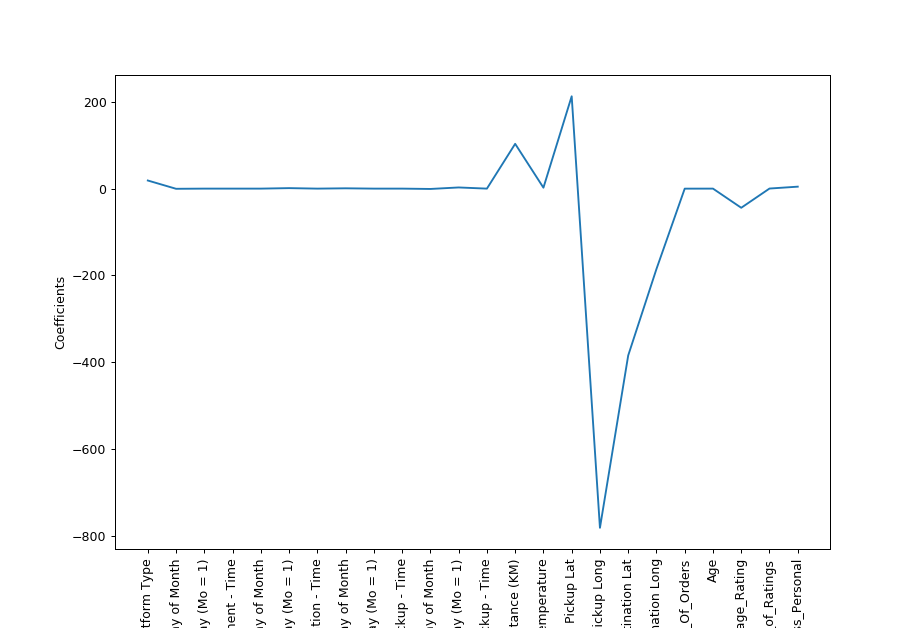

In [270]:
names = X_train.columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_train,y_train).coef_
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 90)
plt.ylabel('Coefficients')
plt.show()

## CONCLUSINS ON THE ABOVE PLOT

# LIGHTGBM Regressor

In [273]:
# Creating an isntance for the LGBMRegressor object
LGBModel = LGBMRegressor(boosting_type='gbdt')

In [277]:
# Training the LGBModel with the numpy array of X_train and y_train
LGBModel.fit(np.array(X_train), y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [278]:
# Making prediction for the validation set
LGBModel.predict(np.array(X_val))

array([1821.83024406, 1795.42958544, 1995.7374827 , ..., 1572.06192105,
       1770.15426702, 1562.485146  ])

In [279]:
model_result = rmse(y_val, LGBM.predict(np.array(X_val)))

In [280]:
best_perfomance(model_result, best_result)

This is now the best perfoming model, with RMSE of 725.6394489505793


In [281]:
best_result = 725.6394489505793

In [289]:
# Making actual predictions for the test set
y_pred = LGBModel.predict(np.array(test_x))

**Saving out predictions in a pandas dataframe**

In [290]:
# Create a Dataframe suitable for submission to Zindi.
# This model has the time of arrival estimated by the base model.
LGBMsubmission = test[['Order No']].copy()

In [291]:
LGBMsubmission['Time from Pickup to Arrival'] = y_pred

In [299]:
# Dataframe showing LGBMsubmission data to be submitted to Zindi as a csv file. 
LGBMsubmission

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1522.407543
1,Order_No_12736,1323.801509
2,Order_No_768,1571.825730
3,Order_No_15332,1204.734915
4,Order_No_21373,1188.435497
...,...,...
7063,Order_No_3612,1596.164631
7064,Order_No_7657,2919.846407
7065,Order_No_1969,1600.341590
7066,Order_No_10591,2641.218605


# Saving the Champion model

After working with all these models. We chose the LGBModel as the performing model with the RMSE of 725.64 which is an improvement to the initial RMSE of the base model which was 793.30. 

In [294]:
# We import the pickle module
import pickle
# Using the pickle module we save the pickle file named LGBModel.pkl
model_save_path = "LGBModel.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(LGBModel,file)

In [295]:
# restoring  the model
model_load_path = "LGBModel.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [296]:
# get predictions from the unpickled model
y_pred = unpickled_model.predict(X_val)

In [297]:
# We use the function to obtain the RMSE of the Base Model.
rmse(y_val, y_pred)

725.6394489505793

# Summary

In this project, several predictive model were trained on dataset provided by Sendy on the platform Zindi. From the several algorithms that were used, their validation set of RMSE are listed below:

In [300]:
# Create a dictionary of these values of RMSE with their respective models: